In [1]:
print("ok")

ok


In [1]:
pip list

Package                 Version
----------------------- -----------
aiohappyeyeballs        2.4.4
aiohttp                 3.11.11
aiosignal               1.3.2
asttokens               3.0.0
attrs                   24.3.0
blinker                 1.9.0
certifi                 2024.12.14
charset-normalizer      3.4.1
click                   8.1.8
colorama                0.4.6
comm                    0.2.2
ctransformers           0.2.5
dataclasses-json        0.5.14
debugpy                 1.8.11
decorator               5.1.1
dnspython               2.7.0
executing               2.1.0
filelock                3.16.1
Flask                   3.1.0
frozenlist              1.5.0
fsspec                  2024.12.0
greenlet                3.1.1
huggingface-hub         0.27.1
idna                    3.10
ipykernel               6.29.5
ipython                 8.31.0
itsdangerous            2.2.0
jedi                    0.19.2
Jinja2                  3.1.5
joblib                  1.4.2
jupyter_client


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from langchain import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Pinecone
import pinecone
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain.llms import CTransformers

h:\Ineuron\medical_chatgpt\medical_chatbot\.env\Lib\site-packages\pinecone\index.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
pinecone.__version__

'2.2.4'

In [4]:
PINECONE_API_KEY = "pcsk_34Xkxc_ap7EWJNWSBZRt9p1NqJKr14Bt47Fr2ya8iu3jpxDDoEiVJrDbp9AvC81TaVCPt"
PINECONE_API_KEY_ENV = "gcp-starter"

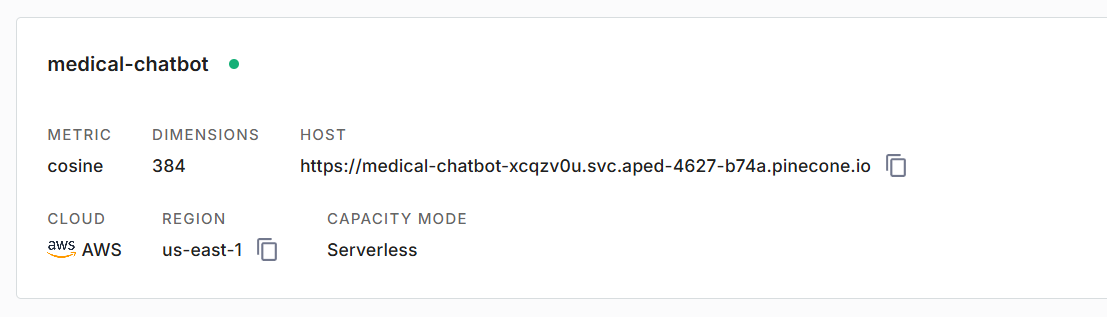

### Load data

In [5]:
#extract data from pdf

def load_pdf(data):
    
    loader= DirectoryLoader(data,
    glob='*.pdf',
    loader_cls = PyPDFLoader)
    documnet = loader.load()
    return documnet

In [6]:
extracted_data = load_pdf("data/")

### Create text chucks

In [7]:
def text_split(extracted_data):
    text_splitter= RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap =20)
    text_chucks = text_splitter.split_documents(extracted_data)
    return text_chucks

In [8]:
text_chunks = text_split(extracted_data)
print("length of chunks:", len(text_chunks))

length of chunks: 5860


In [13]:
text_chunks[0].page_content

'The GALE\nENCYCLOPEDIA\nof MEDICINE\nSECOND EDITION'

### Downlaod embedding model

In [14]:
# call if need to downlaod
def download_huuging_face_embedding():
    embeddings = HuggingFaceEmbeddings(model_name = "sentence-transformers/all-MiniLM-L6-v2")
    return embeddings

In [15]:
embeddings = download_huuging_face_embedding()

In [16]:
embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={})

In [17]:
query_word = embeddings.embed_query("hello world")
print("length,",len(query_word))

length, 384


### Downlaod embedding model

In [21]:
pip install langchain_pinecone 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     ---------------------------------------- 42.9/42.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/382.6 kB ? eta -:--:--
   ------------------------- -------------- 245.8/382.6 kB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 382.6/382.6 kB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/411.9 kB ? eta -:--:--
   ------------------------ -------------- 256.0/411.9 kB 15.4 MB/s eta 0:00:01
   ---------------------------------------- 411.9/411.9 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/427.3 kB ? eta -:--:--
   ---------------------------------- ----- 368.6/427.3 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 427.3/427.3 kB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
   ----------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.0.225 requires pydantic<2,>=1, but you have pydantic 2.10.5 which is incompatible.
langchainplus-sdk 0.0.20 requires pydantic<2,>=1, but you have pydantic 2.10.5 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from pinecone import Pinecone, ServerlessSpec

ImportError: cannot import name 'Pinecone' from 'pinecone' (h:\Ineuron\medical_chatgpt\medical_chatbot\.env\Lib\site-packages\pinecone\__init__.py)

In [29]:
pip install pinecone

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pinecone

In [32]:
pinecone.init(api_key=PINECONE_API_KEY)

In [ ]:
from pinecone import ServerlessSpec

ImportError: cannot import name 'ServerlessSpec' from 'pinecone' (h:\Ineuron\medical_chatgpt\medical_chatbot\.env\Lib\site-packages\pinecone\__init__.py)

: 

In [34]:
pinecone.create_index(
        name="test1",
        dimension=384,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1"),
    )

NameError: name 'ServerlessSpec' is not defined

In [27]:
PINECONE_API_KEY

'pcsk_34Xkxc_ap7EWJNWSBZRt9p1NqJKr14Bt47Fr2ya8iu3jpxDDoEiVJrDbp9AvC81TaVCPt'

In [28]:
pc = pinecone.Pinecone(api_key=PINECONE_API_KEY)

AttributeError: module 'pinecone' has no attribute 'Pinecone'

In [23]:
pc = Pinecone(api_key = PINECONE_API_KEY)

TypeError: Pinecone.__init__() got an unexpected keyword argument 'api_key'

In [20]:
import os
from langchain_pinecone import PineconeVectorStore

ModuleNotFoundError: No module named 'langchain_pinecone'

In [15]:
# to create index
#pinecone.create_index("medical-chatbot1", dimension=384)
#print(pinecone.list_indexes())

pinecone.init(api_key=PINECONE_API_KEY)

index_name = "medical-chatbot"


In [18]:
pip show pinecone

Note: you may need to restart the kernel to use updated packages.


In [17]:
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key=PINECONE_API_KEY)

ImportError: cannot import name 'Pinecone' from 'pinecone' (h:\Ineuron\medical_chatgpt\medical_chatbot\.env\Lib\site-packages\pinecone\__init__.py)

In [16]:
docsearch = Pinecone.from_texts([t.page_content for t in text_chunks], embeddings, index_name = index_name)

ValueError: No active indexes found in your Pinecone project, are you sure you're using the right API key and environment?

In [44]:
pinecone.init(api_key=PINECONE_API_KEY,
              environment = PINECONE_API_KEY_ENV)

In [45]:
print(pinecone.whoami)

<function whoami at 0x0000022561912160>


In [ ]:
pinecone.create_index("medical-chatbot1", dimension=384)

# List available indexes
print(pinecone.list_indexes())

In [ ]:
s